Iteracja nr 1000 na 1000
             Name  Accuracy Crossvalidation
8        SVM c=10   0.96091        0.941483
6         SVM c=5   0.95441        0.935841
13  Drzewo 75% PU  0.934117        0.922059
9   Drzewo 50% PU  0.912669        0.898988
4         SVM c=1  0.871674        0.836192
17  Drzewo 25% PU  0.857517        0.832559
5        K-NN k=5   0.83299         0.78469
3        K-NN k=1  0.755918        0.756278
1      QDA 50% PU  0.725623         0.72476
11     QDA 75% PU  0.725372        0.725926
10     LDA 75% PU  0.717351        0.716266
12     GNB 75% PU  0.715172        0.710316
15     QDA 25% PU  0.714927        0.710704
7       K-NN k=10  0.713366         0.69821
0      LDA 50% PU  0.712611        0.710585
2      GNB 50% PU  0.703847        0.700866
14     LDA 25% PU  0.699209        0.698641
16     GNB 25% PU  0.689533        0.688596


Text(0.5, 1.0, 'Skuteczność dla różnych metod')

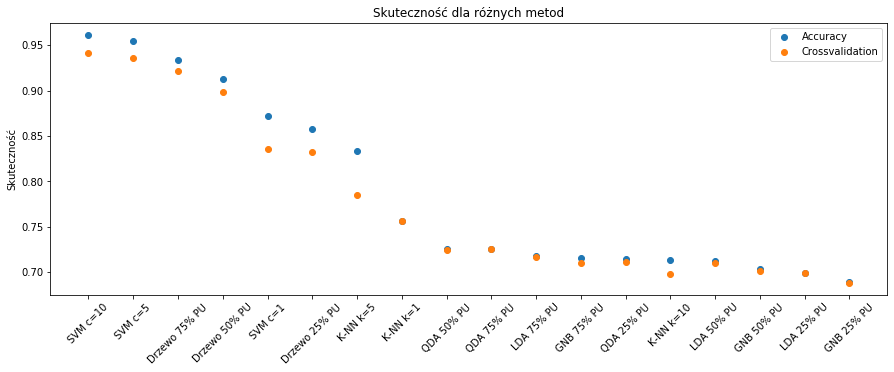

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from IPython.display import clear_output
from sklearn.model_selection import cross_val_score


N=1000   #liczba powtórzeń, po których uśredniamy
n=18  #liczba różnych metod (wliczając różne warianty)

scores_lista_sum = [0]*n    # lista do uśredniania
cross_lista_sum = [0]*n

for i in range (1, N+1):

    # listy do wyników
    scores_lista = []
    cross_lista = []
    nazwy_lista = []

    # przygotowanie daneAll
    daneAll = pd.read_csv('tic-tac-toe.data', sep=",", header=None)       
    daneAll.columns = ["top-left", "top-mid", "top-right", "left-mid", "center", "right-mid", "bottom-left", "bottom-mid", "bottom-right", "class"]

    # przygotowanie daneAllClass i daneAllNoClass - do 
    daneAllTMP = daneAll[:]
    daneAllClass = daneAllTMP.pop("class")
    daneAllNoClass = daneAllTMP[:]


    # 50% PU i 50% PT                                    # korzysta z tego też K-NN i SVM
    # zamianana wartości liczbowe: o->0, x->1, b->2
    # jest 0-957 elementów, zatem 0-478 = PU, 479-957 = PT
    daneAllTMP = daneAll[:]
    daneAllTMP = daneAllTMP.replace(to_replace = "o", value = 0)
    daneAllTMP = daneAllTMP.replace(to_replace = "x", value = 1)
    daneAllTMP = daneAllTMP.replace(to_replace = "b", value = 2)
    daneAllTMP = daneAllTMP.replace(to_replace = "negative", value = 0)
    daneAllTMP = daneAllTMP.replace(to_replace = "positive", value = 1)
    daneShuffledAll = daneAllTMP.sample(frac=1)
    danePU = daneShuffledAll.iloc[0:478, :]
    danePT = daneShuffledAll.iloc[479:957, :]
    daneClassPU = danePU.pop("class")
    daneNoClassPU = danePU[:]
    daneClassPT = danePT.pop("class")
    daneNoClassPT = danePT[:]
    #wykonanie LDA, DQA i GNB
    LDA_klasa = LDA()
    QDA_klasa = QDA()
    GNB_klasa = GNB()
    LDA_klasa.fit(daneNoClassPU.to_numpy(), daneClassPU.to_numpy())
    QDA_klasa.fit(daneNoClassPU.to_numpy(), daneClassPU.to_numpy())
    GNB_klasa.fit(daneNoClassPU.to_numpy(), daneClassPU.to_numpy())
    LDA_wynik = LDA_klasa.predict(daneNoClassPT)
    QDA_wynik = QDA_klasa.predict(daneNoClassPT)
    GNB_wynik = GNB_klasa.predict(daneNoClassPT)
    nazwy_lista.append("LDA 50% PU")
    scores_lista.append(accuracy_score(daneClassPT, LDA_wynik))
    cross_lista.append(np.mean(cross_val_score(LDA_klasa, daneNoClassPU, daneClassPU, cv = 5)))
    nazwy_lista.append("QDA 50% PU")
    scores_lista.append(accuracy_score(daneClassPT, QDA_wynik))
    cross_lista.append(np.mean(cross_val_score(QDA_klasa, daneNoClassPU, daneClassPU, cv = 5)))
    nazwy_lista.append("GNB 50% PU")
    scores_lista.append(accuracy_score(daneClassPT, GNB_wynik))
    cross_lista.append(np.mean(cross_val_score(GNB_klasa, daneNoClassPU, daneClassPU, cv = 5)))
    
    
    #wykonanie K-NN dla k=1, 5, 10 oraz SVM dla c=1, 5, 10
    for j in (1, 5, 10):
        KNN_klasa = KNeighborsClassifier(n_neighbors = j)
        KNN_klasa.fit(daneNoClassPU.to_numpy(), daneClassPU.to_numpy())
        KNN_wynik = KNN_klasa.predict(daneNoClassPT)
        nazwy_lista.append("K-NN k="+str(j))
        scores_lista.append(accuracy_score(daneClassPT, KNN_wynik))
        cross_lista.append(np.mean(cross_val_score(KNN_klasa, daneNoClassPU, daneClassPU, cv = 5)))
        SVM_klasa = svm.SVC(probability = True, C=j)
        SVM_klasa.fit(daneNoClassPU.to_numpy(), daneClassPU.to_numpy())
        SVM_wynik = SVM_klasa.predict(daneNoClassPT)
        nazwy_lista.append("SVM c="+str(j))
        scores_lista.append(accuracy_score(daneClassPT, SVM_wynik))
        cross_lista.append(np.mean(cross_val_score(SVM_klasa, daneNoClassPU, daneClassPU, cv = 5)))
    #wykonanie dla drzewa
    drzewo_klasa = tree.DecisionTreeClassifier()
    drzewo_klasa.fit(daneNoClassPU, daneClassPU)
    drzewo_wynik = drzewo_klasa.predict(daneNoClassPT)
    nazwy_lista.append("Drzewo 50% PU")
    scores_lista.append(accuracy_score(daneClassPT, drzewo_wynik))
    cross_lista.append(np.mean(cross_val_score(drzewo_klasa, daneNoClassPU, daneClassPU, cv = 5)))
    # wykonanie dla kMeans
    #kMeans_klasa = KMeans(n_clusters=2, random_state=0)
    #kMeans_klasa.fit(daneNoClassPU, daneClassPU)
    #kMeans_wynik = kMeans_klasa.predict(daneNoClassPT)
    #nazwy_lista.append("kMeans 50% PU")
    #scores_lista.append(accuracy_score(daneClassPT, kMeans_wynik))


    # 75% PU i 25% PT
    # zamianana wartości liczbowe: o->0, x->1, b->2
    # jest 0-957 elementów, zatem 0-717 = PU, 718-957 = PT
    daneAllTMP = daneAll[:]
    daneAllTMP = daneAllTMP.replace(to_replace = "o", value = 0)
    daneAllTMP = daneAllTMP.replace(to_replace = "x", value = 1)
    daneAllTMP = daneAllTMP.replace(to_replace = "b", value = 2)
    daneAllTMP = daneAllTMP.replace(to_replace = "negative", value = 0)
    daneAllTMP = daneAllTMP.replace(to_replace = "positive", value = 1)
    daneShuffledAll = daneAllTMP.sample(frac=1)
    danePU = daneShuffledAll.iloc[0:717, :]
    danePT = daneShuffledAll.iloc[718:957, :]
    daneClassPU = danePU.pop("class")
    daneNoClassPU = danePU[:]
    daneClassPT = danePT.pop("class")
    daneNoClassPT = danePT[:]
    #wykonanie LDA, DQA i GNB
    LDA_klasa = LDA()
    QDA_klasa = QDA()
    GNB_klasa = GNB()
    LDA_klasa.fit(daneNoClassPU.to_numpy(), daneClassPU.to_numpy())
    QDA_klasa.fit(daneNoClassPU.to_numpy(), daneClassPU.to_numpy())
    GNB_klasa.fit(daneNoClassPU.to_numpy(), daneClassPU.to_numpy())
    LDA_wynik = LDA_klasa.predict(daneNoClassPT)
    QDA_wynik = QDA_klasa.predict(daneNoClassPT)
    GNB_wynik = GNB_klasa.predict(daneNoClassPT)
    nazwy_lista.append("LDA 75% PU")
    scores_lista.append(accuracy_score(daneClassPT, LDA_wynik))
    cross_lista.append(np.mean(cross_val_score(LDA_klasa, daneNoClassPU, daneClassPU, cv = 5)))
    nazwy_lista.append("QDA 75% PU")
    scores_lista.append(accuracy_score(daneClassPT, QDA_wynik))
    cross_lista.append(np.mean(cross_val_score(QDA_klasa, daneNoClassPU, daneClassPU, cv = 5)))
    nazwy_lista.append("GNB 75% PU")
    scores_lista.append(accuracy_score(daneClassPT, GNB_wynik))
    cross_lista.append(np.mean(cross_val_score(GNB_klasa, daneNoClassPU, daneClassPU, cv = 5)))
    #wykonanie dla drzewa
    drzewo_klasa = tree.DecisionTreeClassifier()
    drzewo_klasa.fit(daneNoClassPU, daneClassPU)
    drzewo_wynik = drzewo_klasa.predict(daneNoClassPT)
    nazwy_lista.append("Drzewo 75% PU")
    scores_lista.append(accuracy_score(daneClassPT, drzewo_wynik))
    cross_lista.append(np.mean(cross_val_score(drzewo_klasa, daneNoClassPU, daneClassPU, cv = 5)))
    # wykonanie dla kMeans
    #kMeans_klasa = KMeans(n_clusters=2, random_state=0)
    #kMeans_klasa.fit(daneNoClassPU, daneClassPU)
    #kMeans_wynik = kMeans_klasa.predict(daneNoClassPT)
    #nazwy_lista.append("kMeans 75% PU")
    #scores_lista.append(accuracy_score(daneClassPT, kMeans_wynik))


    # 25% PU i 75% PT
    # zamianana wartości liczbowe: o->0, x->1, b->2
    # to samo co przy 75% PU tylko zamienione miejscami PU i PT
    daneAllTMP = daneAll[:]
    daneAllTMP = daneAllTMP.replace(to_replace = "o", value = 0)
    daneAllTMP = daneAllTMP.replace(to_replace = "x", value = 1)
    daneAllTMP = daneAllTMP.replace(to_replace = "b", value = 2)
    daneAllTMP = daneAllTMP.replace(to_replace = "negative", value = 0)
    daneAllTMP = daneAllTMP.replace(to_replace = "positive", value = 1)
    daneShuffledAll = daneAllTMP.sample(frac=1)
    danePT = daneShuffledAll.iloc[0:717, :]
    danePU = daneShuffledAll.iloc[718:957, :]
    daneClassPU = danePU.pop("class")
    daneNoClassPU = danePU[:]
    daneClassPT = danePT.pop("class")
    daneNoClassPT = danePT[:]
    #wykonanie LDA, DQA i GNB
    LDA_klasa = LDA()
    QDA_klasa = QDA()
    GNB_klasa = GNB()
    LDA_klasa.fit(daneNoClassPU.to_numpy(), daneClassPU.to_numpy())
    QDA_klasa.fit(daneNoClassPU.to_numpy(), daneClassPU.to_numpy())
    GNB_klasa.fit(daneNoClassPU.to_numpy(), daneClassPU.to_numpy())
    LDA_wynik = LDA_klasa.predict(daneNoClassPT)
    QDA_wynik = QDA_klasa.predict(daneNoClassPT)
    GNB_wynik = GNB_klasa.predict(daneNoClassPT)
    nazwy_lista.append("LDA 25% PU")
    scores_lista.append(accuracy_score(daneClassPT, LDA_wynik))
    cross_lista.append(np.mean(cross_val_score(LDA_klasa, daneNoClassPU, daneClassPU, cv = 5)))
    nazwy_lista.append("QDA 25% PU")
    scores_lista.append(accuracy_score(daneClassPT, QDA_wynik))
    cross_lista.append(np.mean(cross_val_score(QDA_klasa, daneNoClassPU, daneClassPU, cv = 5)))
    nazwy_lista.append("GNB 25% PU")
    scores_lista.append(accuracy_score(daneClassPT, GNB_wynik))
    cross_lista.append(np.mean(cross_val_score(GNB_klasa, daneNoClassPU, daneClassPU, cv = 5)))
    #wykonanie dla drzewa
    drzewo_klasa = tree.DecisionTreeClassifier()
    drzewo_klasa.fit(daneNoClassPU, daneClassPU)
    drzewo_wynik = drzewo_klasa.predict(daneNoClassPT)
    nazwy_lista.append("Drzewo 25% PU")
    scores_lista.append(accuracy_score(daneClassPT, drzewo_wynik))
    cross_lista.append(np.mean(cross_val_score(drzewo_klasa, daneNoClassPU, daneClassPU, cv = 5)))
    # wykonanie dla kMeans
    #kMeans_klasa = KMeans(n_clusters=2, random_state=0)
    #kMeans_klasa.fit(daneNoClassPU, daneClassPU)
    #kMeans_wynik = kMeans_klasa.predict(daneNoClassPT)
    #nazwy_lista.append("kMeans 90% PU")
    #scores_lista.append(accuracy_score(daneClassPT, kMeans_wynik))
    
    #sumowanie wyników do scores_lista_sum
    for j in range(0, n):
        scores_lista_sum[j] = scores_lista_sum[j]+scores_lista[j]
        cross_lista_sum[j] = cross_lista_sum[j]+cross_lista[j]
    clear_output(wait=True)
    print("Iteracja nr "+str(i)+" na "+str(N))


# podsumowanie
scores_lista_final = [0]*n
cross_lista_final = [0]*n
for i in range(0, n):
    scores_lista_final[i] = scores_lista_sum[i]/N
    cross_lista_final[i] = cross_lista_sum[i]/N

wyniki_table = pd.DataFrame([nazwy_lista, scores_lista_final, cross_lista_final]).T
wyniki_table.columns = ["Name", "Accuracy", "Crossvalidation"]
wyniki_sorted = wyniki_table.sort_values(by=["Accuracy"], ascending=False)
print(wyniki_sorted)
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(wyniki_sorted["Name"], wyniki_sorted["Accuracy"], 'o', label="Accuracy")
ax.plot(wyniki_sorted["Name"], wyniki_sorted["Crossvalidation"], 'o', label="Crossvalidation")
plt.xticks(rotation=45)
plt.ylabel("Skuteczność")
plt.legend(loc='upper right')
plt.title("Skuteczność dla różnych metod")